<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/(Andhi_Hamzah)_Covid_19_Indonesia_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID 19 - Indonesia Dataset



1. Bagaimana Melihat Kasus Di Indonesia ?
2. Bagaimana Melihat Data Di Jawa Barat ?
3. Apakah Total Kasus di Indonesia Termasuk Tinggi ?
4. Apakah Kasus naik tiap periodenya ?
5. Apakah Kasus Sembuh Meningkat ?
6. Apakah kasus Meninggal Meningkat ?
7. Bagaimana Cara Membandingkan Antar Kasus ?

# Data Import

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andhihamzah","key":"b3afadbe6663a10cdcd7032c54f70376"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d hendratno/covid19-indonesia

  0% 0.00/236k [00:00<?, ?B/s]
100% 236k/236k [00:00<00:00, 34.7MB/s]


In [5]:
!ls

covid19-indonesia.zip  kaggle.json  sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('covid19-indonesia.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [1]:
#memasukkan data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
%matplotlib inline


In [2]:
path = ("/content/files/covid_19_indonesia_time_series_all.csv")
data = pd.read_csv(path)
data.head(10)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,5,2,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,41.67%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,493,20,39,434,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.00,1.84,4.06%,7.91%,1.00,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,0.00,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,13,6,5,2,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.29,0.02,0.13,46.15%,38.46%,0.33,NaN
7,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,495,20,39,436,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.64,0.00,1.84,4.04%,7.88%,1.00,1.0
8,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,1.00,1.0
9,3/4/2020,ID-JB,Jawa Barat,1,0,0,1,14,6,5,3,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.31,0.00,0.13,42.86%,35.71%,1.00,0.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
#investigate data statistics
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
count,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,0.0,7097.000000,6899.000000,7097.000000,6897.000000,6872.000000,7.097000e+03,7.097000e+03,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,6328.000000,6226.000000
mean,93.874595,3.331408,71.851487,18.691701,5386.270678,234.527970,3510.066225,1641.676483,NaN,25.010709,6.111031,436.517684,528.831811,4668.908615,1.150392e+05,1.616379e+07,785.360072,113.671325,-2.759288,6.943032,392.088398,0.198394,13.525061,1.419701,0.974846
std,368.150061,12.156269,310.812594,106.893910,23068.883098,945.058318,16633.421459,5892.596123,NaN,70.967351,17.000627,1238.027472,1475.074888,13068.615468,3.306874e+05,4.625346e+07,2838.522255,9.844168,3.598916,13.516912,673.549576,0.439838,21.740158,2.941523,0.963323
min,0.000000,0.000000,0.000000,-1762.000000,1.000000,0.000000,0.000000,-33.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,-1.000000,130.000000,4.000000,41.000000,44.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,2.570289e+06,47.790000,106.109004,-6.204699,0.190000,30.490000,0.000000,1.110000,0.500000,1.000000
50%,10.000000,0.000000,4.000000,1.000000,493.000000,17.000000,241.000000,186.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,2.090000,128.010000,0.000000,3.890000,1.000000,1.000000
75%,49.000000,1.000000,26.000000,16.000000,2568.000000,97.000000,1416.000000,953.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,7.780000,492.660000,0.240000,16.790000,1.300000,1.000000
max,4850.000000,160.000000,4510.000000,1533.000000,333449.000000,11844.000000,255027.000000,66578.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,184.100000,8017.870000,7.600000,174.160000,92.000000,27.000000


# Data Preparation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         7097 non-null   datetime64[ns]
 1   Location ISO Code            7097 non-null   object        
 2   Location                     7097 non-null   object        
 3   New Cases                    7097 non-null   int64         
 4   New Deaths                   7097 non-null   int64         
 5   New Recovered                7097 non-null   int64         
 6   New Active Cases             7097 non-null   int64         
 7   Total Cases                  7097 non-null   int64         
 8   Total Deaths                 7097 non-null   int64         
 9   Total Recovered              7097 non-null   int64         
 10  Total Active Cases           7097 non-null   int64         
 11  Location Level               7097 non-null 

In [6]:
#check null data percentage
data.isnull().mean()*100

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         3.156263
Country                          0.000000
Continent                        0.000000
Island                           3.156263
Time Zone                        3.156263
Special Status                  85.374102
Total Regencies                  0.000000
Total Cities                     2.789911
Total Districts                  0.000000
Total Urban Villages             2.818092
Total Rural Villages             3

In [7]:
#check missing values or NaN percentage in each column
data.isna().mean()*100

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         3.156263
Country                          0.000000
Continent                        0.000000
Island                           3.156263
Time Zone                        3.156263
Special Status                  85.374102
Total Regencies                  0.000000
Total Cities                     2.789911
Total Districts                  0.000000
Total Urban Villages             2.818092
Total Rural Villages             3

In [8]:
# delete column with missing (NaN) data
# 'City or Regency' has 100% null data
data = data.drop('City or Regency',axis=1)

In [9]:
#inspect 'Special Status' column
data['Special Status'].value_counts()

Daerah Khusus             603
Daerah Khusus Ibu Kota    225
Daerah Istimewa           210
Name: Special Status, dtype: int64

In [10]:
#delete 'Special Status' column
data = data.drop('Special Status', axis=1)

In [11]:
#inspect 'Growth Factor of New Cases' column
data['Growth Factor of New Cases'].head(10)

0     NaN
1    1.00
2     NaN
3     NaN
4    1.00
5    0.00
6    0.33
7    1.00
8    1.00
9    1.00
Name: Growth Factor of New Cases, dtype: float64

In [12]:
# replace NaN with 0
data['Growth Factor of New Cases'] = data['Growth Factor of New Cases'].fillna(float(0))

In [13]:
# replace NaN with 0 for "Growth Factor of New Deaths"
data['Growth Factor of New Deaths'] = data['Growth Factor of New Deaths'].fillna(float(0))

In [14]:
#inspect columns with same percentage
data[['Province','Island','Time Zone']].head(10)

,Province,Island,Time Zone
0,DKI Jakarta,Jawa,UTC+07:00
1,DKI Jakarta,Jawa,UTC+07:00
2,NaN,NaN,NaN
3,Jawa Barat,Jawa,UTC+07:00
4,DKI Jakarta,Jawa,UTC+07:00
5,NaN,NaN,NaN
6,Jawa Barat,Jawa,UTC+07:00
7,DKI Jakarta,Jawa,UTC+07:00
8,NaN,NaN,NaN
9,Jawa Barat,Jawa,UTC+07:00


In [15]:
# replace NaN value with "Unknown"
data.update(data[['Province','Island','Time Zone']].fillna('Unknown'))

In [16]:
#inspect 'Total Rural Villages' column
data[['Location','Province','Total Cities','Total Urban Villages','Total Rural Villages']].head(20)

,Location,Province,Total Cities,Total Urban Villages,Total Rural Villages
0,DKI Jakarta,DKI Jakarta,5.0,267.0,NaN
1,DKI Jakarta,DKI Jakarta,5.0,267.0,NaN
2,Indonesia,Unknown,98.0,8488.0,74953.0
3,Jawa Barat,Jawa Barat,9.0,645.0,5312.0
4,DKI Jakarta,DKI Jakarta,5.0,267.0,NaN
5,Indonesia,Unknown,98.0,8488.0,74953.0
6,Jawa Barat,Jawa Barat,9.0,645.0,5312.0
7,DKI Jakarta,DKI Jakarta,5.0,267.0,NaN
8,Indonesia,Unknown,98.0,8488.0,74953.0
9,Jawa Barat,Jawa Barat,9.0,645.0,5312.0


In [17]:
# replace NaN with 0
data['Total Rural Villages'] = data['Total Rural Villages'].fillna(float(0))

In [18]:
# inspect 'Total Cities' column
data[['Province','Total Active Cases','Total Cities','Total Urban Villages','Total Rural Villages']].tail(10)

,Province,Total Active Cases,Total Cities,Total Urban Villages,Total Rural Villages
7087,Papua Barat,1416,1.0,95.0,1742.0
7088,Riau,3641,2.0,268.0,1591.0
7089,Sulawesi Barat,230,NaN,73.0,575.0
7090,Sulawesi Selatan,2413,3.0,792.0,2255.0
7091,Sulawesi Tengah,172,1.0,175.0,1842.0
7092,Sulawesi Tenggara,1154,2.0,377.0,1911.0
7093,Sulawesi Utara,666,4.0,332.0,1507.0
7094,Sumatera Barat,3647,7.0,230.0,928.0
7095,Sumatera Selatan,1289,4.0,387.0,2853.0
7096,Sumatera Utara,2158,8.0,693.0,5417.0


In [19]:
# replace NaN with 0
data['Total Cities'] = data['Total Cities'].fillna(float(0))

In [20]:
# inspect 'Total Urban Villages' column
data[['Location','Province','Total Active Cases','Total Cities','Total Urban Villages','Total Rural Villages']].tail(40)

,Location,Province,Total Active Cases,Total Cities,Total Urban Villages,Total Rural Villages
7057,Sulawesi Tenggara,Sulawesi Tenggara,1070,2.0,377.0,1911.0
7058,Sulawesi Utara,Sulawesi Utara,661,4.0,332.0,1507.0
7059,Sumatera Barat,Sumatera Barat,3503,7.0,230.0,928.0
7060,Sumatera Selatan,Sumatera Selatan,1297,4.0,387.0,2853.0
7061,Sumatera Utara,Sumatera Utara,2236,8.0,693.0,5417.0
7062,Aceh,Aceh,1973,5.0,NaN,6497.0
7063,Bali,Bali,1118,1.0,80.0,636.0
7064,Banten,Banten,1756,4.0,313.0,1238.0
7065,Bengkulu,Bengkulu,124,1.0,172.0,1341.0
7066,DKI Jakarta,DKI Jakarta,13620,5.0,267.0,0.0


In [21]:
#replace NaN with 0
data['Total Urban Villages'].fillna(float(0), inplace=True)

# check if data is clean or no missing value
data.isna().mean()*100

Date                           0.0
Location ISO Code              0.0
Location                       0.0
New Cases                      0.0
New Deaths                     0.0
New Recovered                  0.0
New Active Cases               0.0
Total Cases                    0.0
Total Deaths                   0.0
Total Recovered                0.0
Total Active Cases             0.0
Location Level                 0.0
Province                       0.0
Country                        0.0
Continent                      0.0
Island                         0.0
Time Zone                      0.0
Total Regencies                0.0
Total Cities                   0.0
Total Districts                0.0
Total Urban Villages           0.0
Total Rural Villages           0.0
Area (km2)                     0.0
Population                     0.0
Population Density             0.0
Longitude                      0.0
Latitude                       0.0
New Cases per Million          0.0
Total Cases per Mill

In [22]:
# inspect for duplicate value in each column
data[['Location ISO Code', 'Location', 'Province','Country','Continent','Island']].head(20)

,Location ISO Code,Location,Province,Country,Continent,Island
0,ID-JK,DKI Jakarta,DKI Jakarta,Indonesia,Asia,Jawa
1,ID-JK,DKI Jakarta,DKI Jakarta,Indonesia,Asia,Jawa
2,IDN,Indonesia,Unknown,Indonesia,Asia,Unknown
3,ID-JB,Jawa Barat,Jawa Barat,Indonesia,Asia,Jawa
4,ID-JK,DKI Jakarta,DKI Jakarta,Indonesia,Asia,Jawa
5,IDN,Indonesia,Unknown,Indonesia,Asia,Unknown
6,ID-JB,Jawa Barat,Jawa Barat,Indonesia,Asia,Jawa
7,ID-JK,DKI Jakarta,DKI Jakarta,Indonesia,Asia,Jawa
8,IDN,Indonesia,Unknown,Indonesia,Asia,Unknown
9,ID-JB,Jawa Barat,Jawa Barat,Indonesia,Asia,Jawa


In [23]:
# drop 'Location', duplicate value with 'Province'
data.drop('Location',axis=1, inplace=True)
data.head()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,2,0,0,2,489,20,39,430,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,0.0,0.0
1,2020-03-02,ID-JK,2,0,0,2,491,20,39,432,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,2020-03-02,IDN,2,0,0,2,2,0,0,2,Country,Unknown,Indonesia,Asia,Unknown,Unknown,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,0.0,0.0
3,2020-03-02,ID-JB,3,0,0,3,12,5,5,2,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,41.67%,0.0,0.0
4,2020-03-03,ID-JK,2,0,0,2,493,20,39,434,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.0,1.84,4.06%,7.91%,1.0,1.0


In [24]:
# extract for Indonesia Covid-19 case 
columns = ['Date', 'Location ISO Code','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
data_covid = data[data['Location ISO Code']== 'IDN']
data_covid = data_covid[columns]
data_covid.head(10)

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
2,2020-03-02,IDN,2,0,0,2,2,0,0,2
5,2020-03-03,IDN,0,0,0,0,2,0,0,2
8,2020-03-04,IDN,0,0,0,0,2,0,0,2
11,2020-03-05,IDN,0,0,0,0,2,0,0,2
15,2020-03-06,IDN,2,0,0,2,4,0,0,4
19,2020-03-07,IDN,0,0,0,0,4,0,0,4
23,2020-03-08,IDN,2,0,0,2,6,0,0,6
27,2020-03-09,IDN,13,0,0,13,19,0,0,19
31,2020-03-10,IDN,8,0,2,6,27,0,2,25
36,2020-03-11,IDN,7,1,0,6,34,1,2,31


In [25]:
# prepare data for visualization
data_covid_total= data_covid.groupby('Date')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().reset_index().sort_values('Date', ascending=True).reset_index(drop=True)
data_covid_total.head(10)

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-02,2,0,0,2
1,2020-03-03,2,0,0,2
2,2020-03-04,2,0,0,2
3,2020-03-05,2,0,0,2
4,2020-03-06,4,0,0,4
5,2020-03-07,4,0,0,4
6,2020-03-08,6,0,0,6
7,2020-03-09,19,0,0,19
8,2020-03-10,27,0,2,25
9,2020-03-11,34,1,2,31


# Data Visualisation

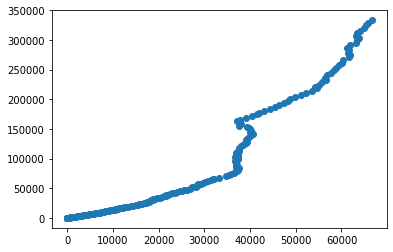

In [26]:
#@title Scatter Plot
import matplotlib.pyplot as plt
y=data_covid_total["Total Cases"]
x=data_covid_total["Total Active Cases"]
plt.scatter(x,y)

(0.0, 83235.5025024631)

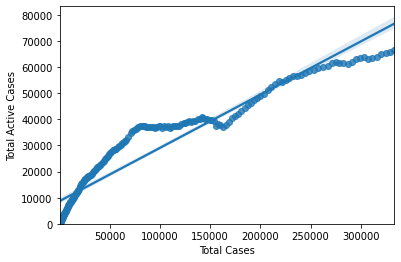

In [27]:
#@title Correlation
sns.regplot(x="Total Cases", y="Total Active Cases", data=data_covid_total)
plt.ylim(0,)

Text(0.5, 1.0, 'Total Cases')

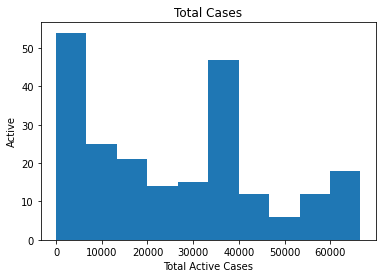

In [28]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data_covid_total["Total Active Cases"])

# set x/y labels and plot title
plt.pyplot.xlabel("Total Active Cases")
plt.pyplot.ylabel("Active")
plt.pyplot.title("Total Cases")

In [29]:
# plot Indonesia Covid 19 cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_covid_total['Date'],
                         y=data_covid_total['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.add_trace(go.Scatter(x=data_covid_total['Date'],
                         y=data_covid_total['Total Active Cases'],
                         mode='lines',
                         name= 'Active Cases',
                         marker_color= 'red'
                         ))

fig.add_trace(go.Scatter(x=data_covid_total['Date'],
                         y=data_covid_total['Total Deaths'],
                         mode='lines',
                         name='Death Cases',
                         marker_color='black',
                         line=dict(dash='dot')
                        ))

fig.add_trace(go.Scatter(x=data_covid_total['Date'],
                         y=data_covid_total['Total Recovered'],
                         mode='lines',
                         name='Recovered Case',
                         marker_color='green'
                        ))

fig.update_layout(title='Indonesia Covid Cases',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )
fig.show()

In [30]:
# plot Active Cases
fig = go.Figure(go.Bar(x=data_covid_total['Date'],
                       y=data_covid_total['Total Active Cases'],
                       marker_color='red'
                      ))

fig.update_layout(title='Indonesia Active Cases',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )

fig.show()

In [31]:
# plot Death Cases
fig = go.Figure(go.Bar(x=data_covid_total['Date'],
                       y=data_covid_total['Total Deaths'],
                       marker_color='black'
                      ))
fig.update_layout(title='Indonesia Death Cases',
                  template='plotly_white',
                  xaxis_title='Date',
                  yaxis_title='Total Cases'
                 )
fig.show()

In [32]:
# plot Recovered Cases
fig = go.Figure(go.Bar(x=data_covid_total['Date'],
                       y=data_covid_total['Total Recovered'],
                       marker_color='green'
                      ))

fig.update_layout(title='Indonesia Recovered Cases',
                  template='plotly_white',
                  xaxis_title='Date',
                  yaxis_title='Total Case'
                 )
fig.show()


In [33]:
data_covid_total.sort_values(by='Total Cases', ascending=True, inplace=True)

df_top15 = data_covid_total['Total Cases'].tail(15)
df_top15

209    275213
210    278722
211    282724
212    287008
213    291182
214    295499
215    299506
216    303498
217    307120
218    311176
219    315714
220    320564
221    324658
222    328952
223    333449
Name: Total Cases, dtype: int64

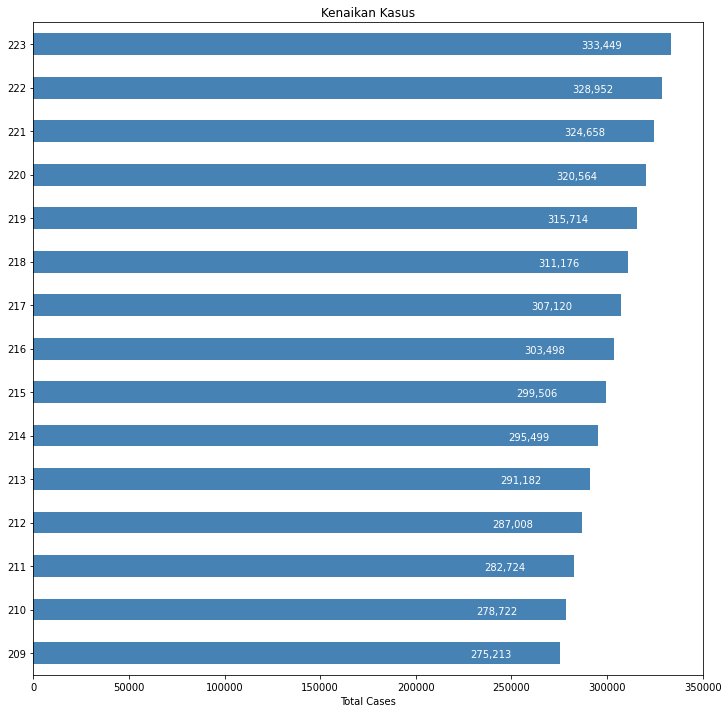

In [36]:
import matplotlib.pyplot as plt
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Total Cases')
plt.title('Kenaikan Kasus')

 # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

In [37]:
# extract for Jabar Covid-19 case 
columns = ['Date', 'Location ISO Code','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
Jb_covid = data[data['Location ISO Code']== 'ID-JB']
Jb_covid = Jb_covid[columns]
Jb_covid.head(10)

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
3,2020-03-02,ID-JB,3,0,0,3,12,5,5,2
6,2020-03-03,ID-JB,1,1,0,0,13,6,5,2
9,2020-03-04,ID-JB,1,0,0,1,14,6,5,3
12,2020-03-05,ID-JB,1,0,0,1,15,6,5,4
16,2020-03-06,ID-JB,1,0,0,1,16,6,5,5
20,2020-03-07,ID-JB,0,0,0,0,16,6,5,5
24,2020-03-08,ID-JB,0,0,0,0,16,6,5,5
28,2020-03-09,ID-JB,0,0,0,0,16,6,5,5
32,2020-03-10,ID-JB,0,0,0,0,16,6,5,5
37,2020-03-11,ID-JB,0,1,0,-1,16,7,5,4


In [38]:
# prepare data for visualization
Jb_covid_total= Jb_covid.groupby('Date')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().reset_index().sort_values('Date', ascending=True).reset_index(drop=True)
Jb_covid_total.head(10)

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-02,12,5,5,2
1,2020-03-03,13,6,5,2
2,2020-03-04,14,6,5,3
3,2020-03-05,15,6,5,4
4,2020-03-06,16,6,5,5
5,2020-03-07,16,6,5,5
6,2020-03-08,16,6,5,5
7,2020-03-09,16,6,5,5
8,2020-03-10,16,6,5,5
9,2020-03-11,16,7,5,4


In [39]:
# plot Jabar Covid 19 cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=Jb_covid_total['Date'],
                         y=Jb_covid_total['Total Cases'],
                         mode='lines',
                         name= 'Total Cases'
                        ))

fig.add_trace(go.Scatter(x=Jb_covid_total['Date'],
                         y=Jb_covid_total['Total Active Cases'],
                         mode='lines',
                         name= 'Active Cases',
                         marker_color= 'red'
                         ))

fig.add_trace(go.Scatter(x=Jb_covid_total['Date'],
                         y=Jb_covid_total['Total Deaths'],
                         mode='lines',
                         name='Death Cases',
                         marker_color='black',
                         line=dict(dash='dot')
                        ))

fig.add_trace(go.Scatter(x=Jb_covid_total['Date'],
                         y=Jb_covid_total['Total Recovered'],
                         mode='lines',
                         name='Recovered Case',
                         marker_color='green'
                        ))

fig.update_layout(title='Jabar Covid Cases',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases')
fig.show()

In [40]:
# plot Active Cases
fig = go.Figure(go.Bar(x=Jb_covid_total['Date'],
                       y=Jb_covid_total['Total Active Cases'],
                       marker_color='red'
                      ))

fig.update_layout(title='Jabar Active Cases',
                 template='plotly_white',
                 xaxis_title='Date',
                 yaxis_title='Total Cases'
                 )

fig.show()

In [41]:
# plot Death Cases
fig = go.Figure(go.Bar(x=Jb_covid_total['Date'],
                       y=Jb_covid_total['Total Deaths'],
                       marker_color='black'
                      ))
fig.update_layout(title='Jabar Death Cases',
                  template='plotly_white',
                  xaxis_title='Date',
                  yaxis_title='Total Cases'
                 )
fig.show()

In [42]:
# plot Recovered
fig = go.Figure(go.Bar(x=Jb_covid_total['Date'],
                       y=Jb_covid_total['Total Recovered'],
                       marker_color='green'
                      ))

fig.update_layout(title='Jabar Recovered Cases',
                  template='plotly_white',
                  xaxis_title='Date',
                  yaxis_title='Total Case'
                 )
fig.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         7097 non-null   datetime64[ns]
 1   Location ISO Code            7097 non-null   object        
 2   New Cases                    7097 non-null   int64         
 3   New Deaths                   7097 non-null   int64         
 4   New Recovered                7097 non-null   int64         
 5   New Active Cases             7097 non-null   int64         
 6   Total Cases                  7097 non-null   int64         
 7   Total Deaths                 7097 non-null   int64         
 8   Total Recovered              7097 non-null   int64         
 9   Total Active Cases           7097 non-null   int64         
 10  Location Level               7097 non-null   object        
 11  Province                     7097 non-null 

In [44]:
data.head()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,2,0,0,2,489,20,39,430,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,0.0,0.0
1,2020-03-02,ID-JK,2,0,0,2,491,20,39,432,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,2020-03-02,IDN,2,0,0,2,2,0,0,2,Country,Unknown,Indonesia,Asia,Unknown,Unknown,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,0.0,0.0
3,2020-03-02,ID-JB,3,0,0,3,12,5,5,2,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,41.67%,0.0,0.0
4,2020-03-03,ID-JK,2,0,0,2,493,20,39,434,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,1,5.0,44,267.0,0.0,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.0,1.84,4.06%,7.91%,1.0,1.0


In [45]:
data.isnull().sum()

Date                           0
Location ISO Code              0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deaths per Million       0
Case Fatal

# Specialized Visualization Tools

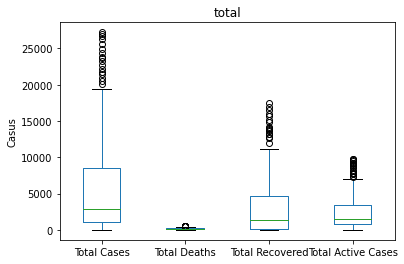

In [46]:
#@title Box Plots
import matplotlib.pyplot as plt
Jb_covid_total.plot(kind='box')
plt.ylabel("Casus")
plt.title("total")
plt.show()

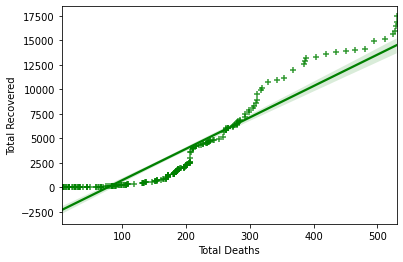

In [47]:
ax = sns.regplot(x='Total Deaths', y='Total Recovered', data=Jb_covid_total, marker='+', color='green')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         7097 non-null   datetime64[ns]
 1   Location ISO Code            7097 non-null   object        
 2   New Cases                    7097 non-null   int64         
 3   New Deaths                   7097 non-null   int64         
 4   New Recovered                7097 non-null   int64         
 5   New Active Cases             7097 non-null   int64         
 6   Total Cases                  7097 non-null   int64         
 7   Total Deaths                 7097 non-null   int64         
 8   Total Recovered              7097 non-null   int64         
 9   Total Active Cases           7097 non-null   int64         
 10  Location Level               7097 non-null   object        
 11  Province                     7097 non-null 

Text(0, 0.5, 'Covid')

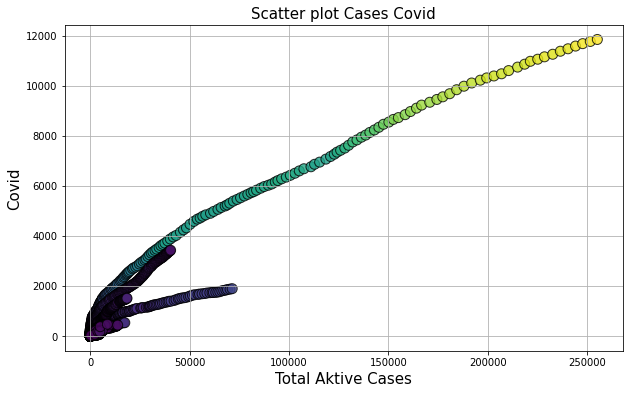

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(data['Total Recovered'],data['Total Deaths'],c=data['Total Active Cases'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot Cases Covid",fontsize=15)
plt.xlabel("Total Aktive Cases",fontsize=15)
plt.ylabel("Covid",fontsize=15)

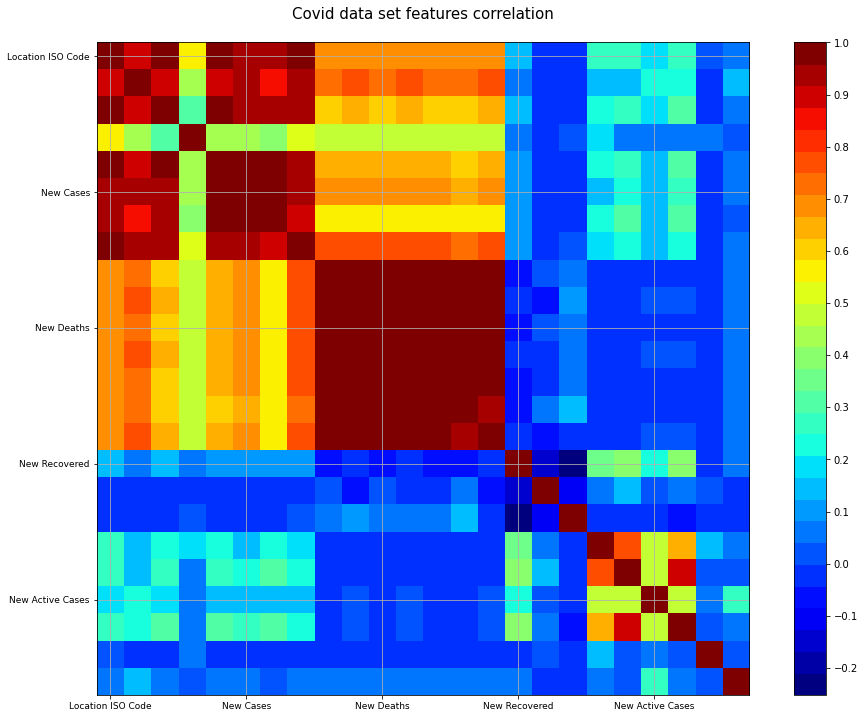

In [50]:
def correlation_matrix(data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Covid data set features correlation\n',fontsize=15)
    labels=data.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(data)

# DecisionTrees

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



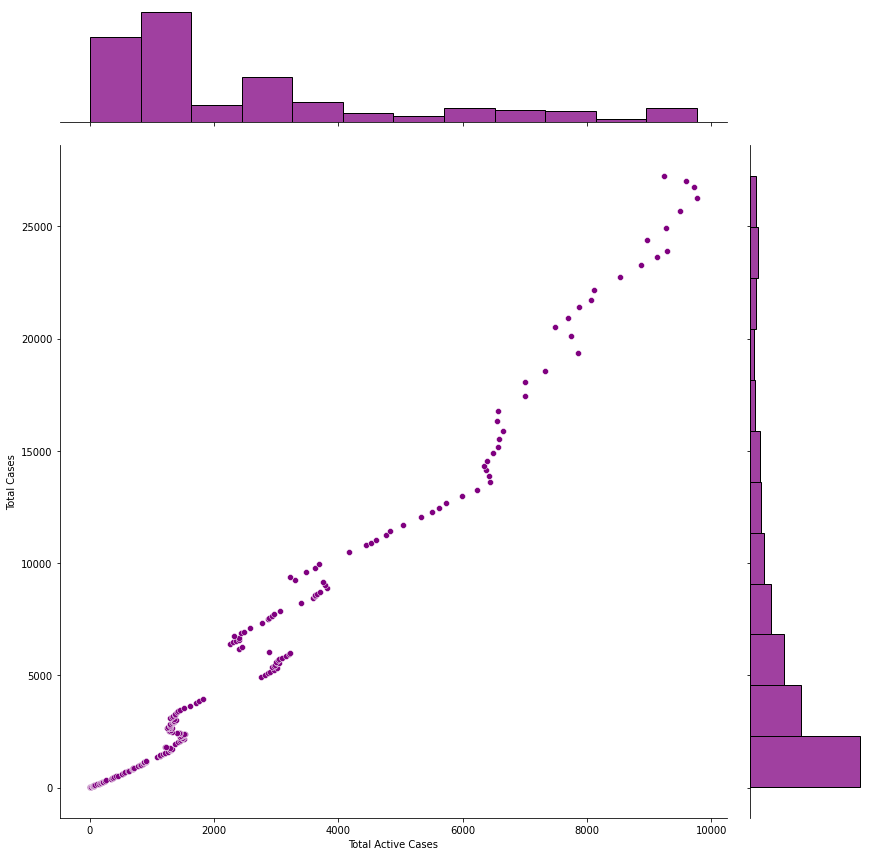

In [54]:
sns.jointplot(x='Total Active Cases',y='Total Cases',data=Jb_covid_total, color='purple', size=12)

In [57]:
from sklearn.model_selection import train_test_split
X = Jb_covid_total.drop('Date',axis=1)
y = Jb_covid_total['Date']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [60]:
x.head()

0    2
1    2
2    2
3    2
4    4
Name: Total Active Cases, dtype: int64

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [63]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
predictions = dtree.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,predictions))

                               precision    recall  f1-score   support

2020-03-03T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-04T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-05T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-06T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-08T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-11T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-12T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-13T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-16T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-21T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-22T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-24T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-25T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [67]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy of prediction: 0.0


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=600)

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rfc_pred = rfc.predict(X_test)

In [72]:
cr = classification_report(y_test,predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [73]:
print(cr)

                               precision    recall  f1-score   support

2020-03-03T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-04T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-05T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-06T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-08T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-11T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-12T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-13T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-16T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-21T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-22T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-24T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-25T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-

In [74]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [75]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

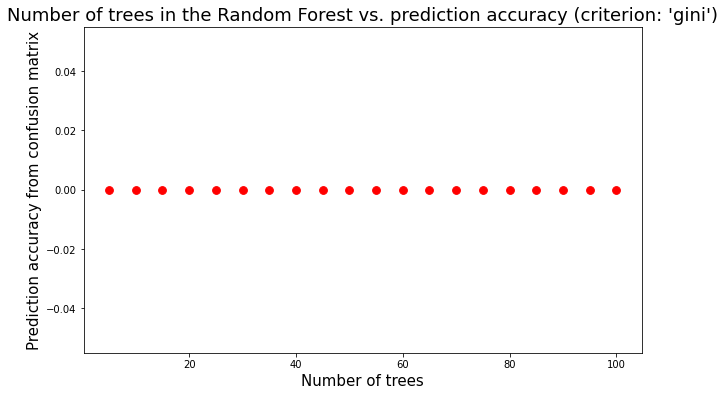

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [77]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

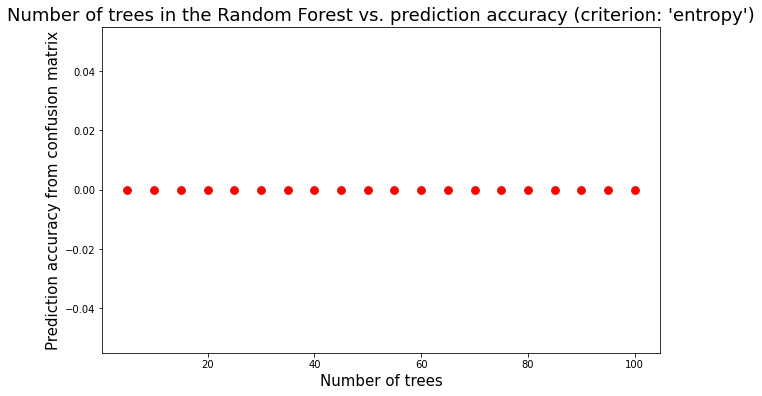

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [79]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

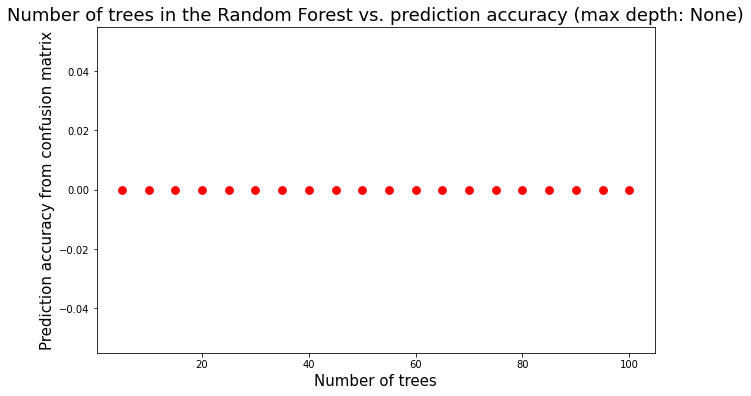

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [81]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

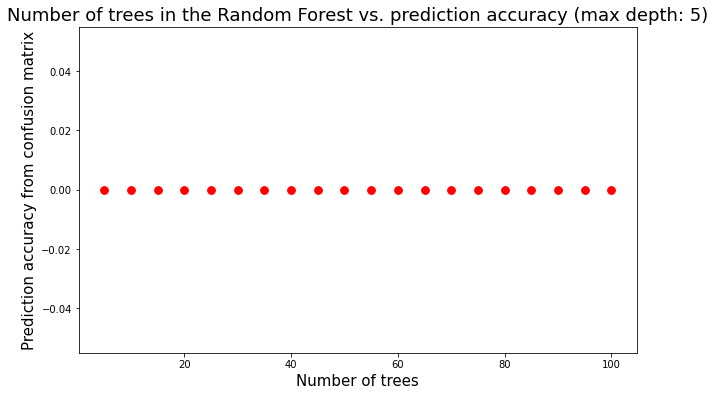

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [83]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

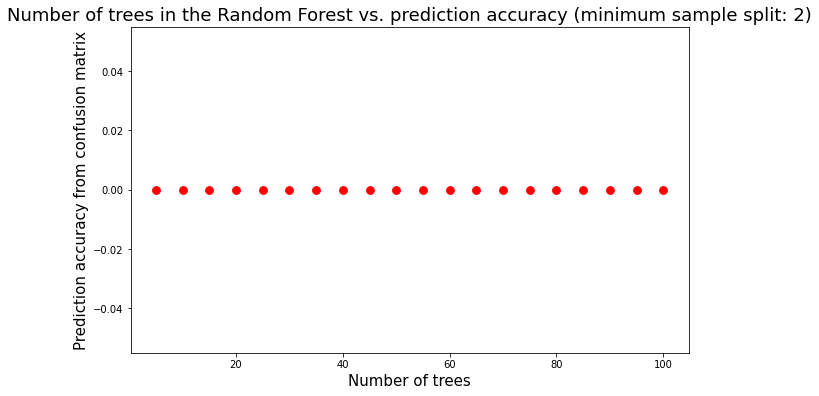

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [85]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

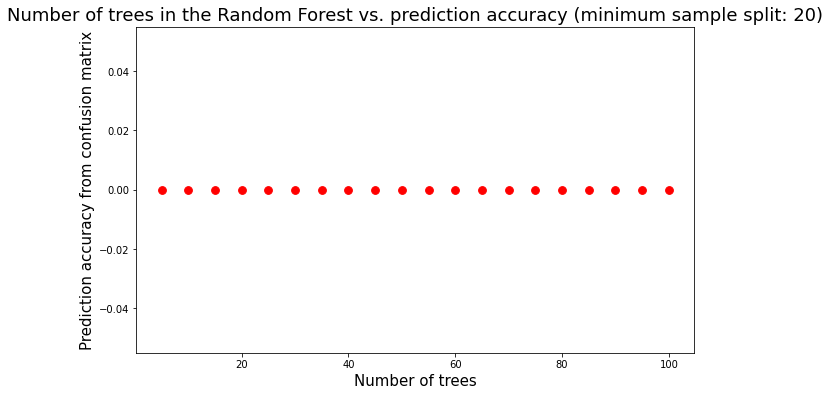

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

# Naive Bayes Classification

In [62]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [107]:
Jb_covid_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                224 non-null    datetime64[ns]
 1   Total Cases         224 non-null    int64         
 2   Total Deaths        224 non-null    int64         
 3   Total Recovered     224 non-null    int64         
 4   Total Active Cases  224 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.9 KB


In [135]:
X = Jb_covid_total.drop('Date', axis=1) 
y = Jb_covid_total['Date']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [136]:
X_train.shape

(156, 4)

In [137]:
X_train.head()

,Total Cases,Total Deaths,Total Recovered,Total Active Cases
215,2.596467,2.362480,2.590685,2.567008
103,-0.483009,-0.049106,-0.471491,-0.513352
78,-0.607738,-0.369010,-0.654230,-0.530997
72,-0.628721,-0.582280,-0.695739,-0.508647
129,-0.151965,0.155961,-0.292332,0.066960


In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
nbc = GaussianNB()

In [140]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 68 test samples is 68


In [142]:
from sklearn.metrics import classification_report

In [143]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

                               precision    recall  f1-score   support

2020-03-02T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-03T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-04T00:00:00.000000000       0.00      0.00      0.00       2.0
2020-03-05T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-06T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-07T00:00:00.000000000       0.00      0.00      0.00       2.0
2020-03-11T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-12T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-16T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-17T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-18T00:00:00.000000000       0.00      0.00      0.00       1.0
2020-03-19T00:00:00.000000000       0.00      0.00      0.00       0.0
2020-03-22T00:00:00.000000000   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'],columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

ValueError: ignored